<a href="https://colab.research.google.com/github/221sakshisharma/coursera-ML-work/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

%matplotlib inline

#Loading The Dataset

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df = pd.read_csv(url)

In [ ]:
df.shape

(1000, 12)

In [ ]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases.

#EDA

In [ ]:
class_names = {
    1: "Basic Service",
    2: "E-Service",
    3: "Plus Service",
    4: "Total Service"
}

## Analysing the class Distribution

In [ ]:
df['custcat'].value_counts()

,count
custcat,
2,217
4,236
1,266
3,281


<Axes: ylabel='custcat'>

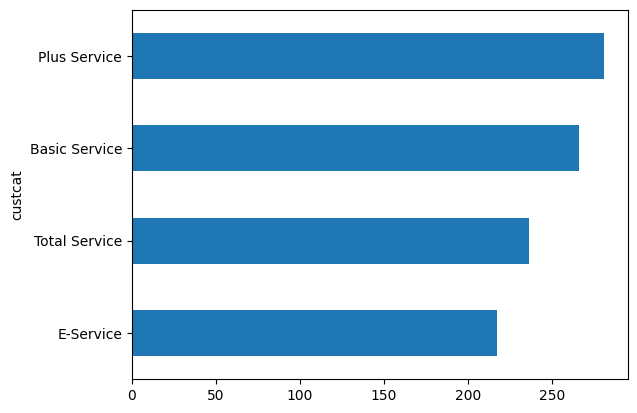

In [ ]:
df['custcat'].map(class_names).value_counts(ascending=True).plot(kind='barh')

##Analysing the correlation of features with the target variable

In [ ]:
correlation_matrix = df.corr()

<Axes: >

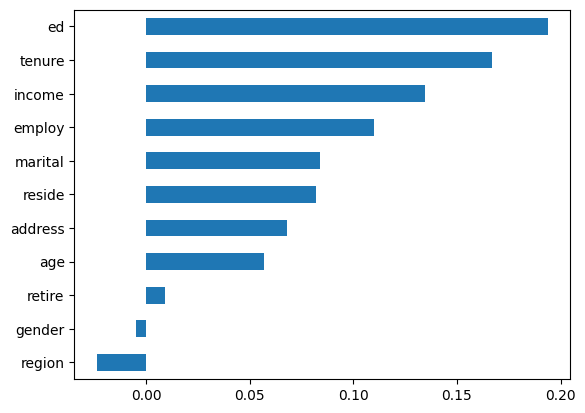

In [ ]:
correlation_matrix['custcat'].drop('custcat').sort_values().plot(kind='barh')

We can observe that ed > tenure > income > employ are the ones affecting custcat the most

##Analysing the correlation among features

<Axes: >

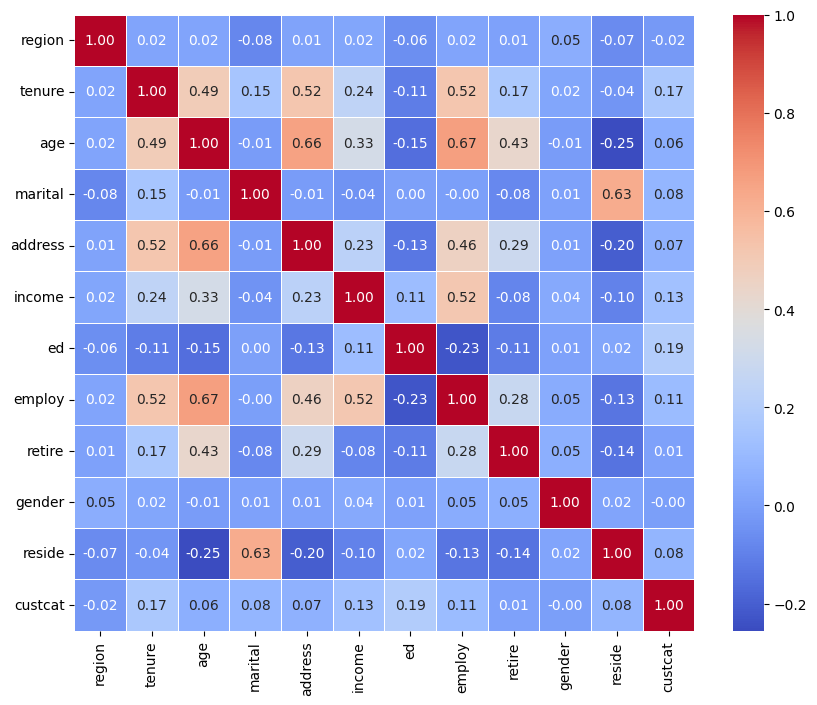

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt ='.2f', linewidths=0.5)

##Visualising the range of features

<Axes: >

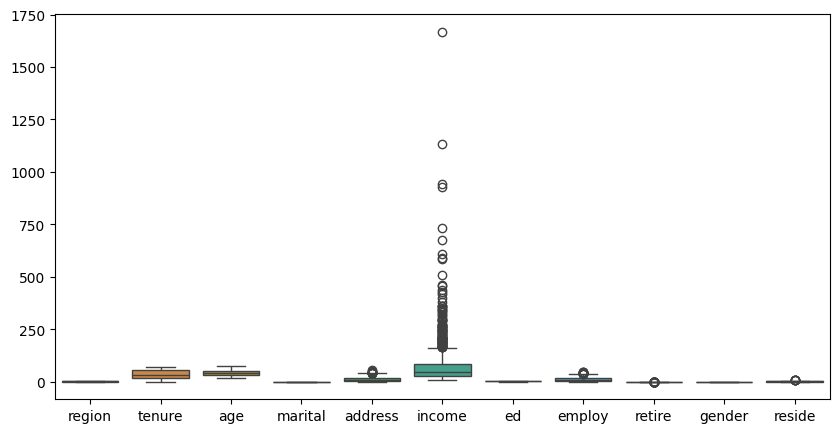

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop('custcat', axis=1))

##Seperating Input and Target Features

In [ ]:
# X = df.drop(['custcat', 'gender', 'retire'],axis=1)
X = df[['ed', 'tenure', 'income', 'employ']]
y = df['custcat']

#Preprocessing

##Normalisation

Data Normalisation/Standardization is very important for the KNN Model

In [ ]:
X_std = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Standardization')

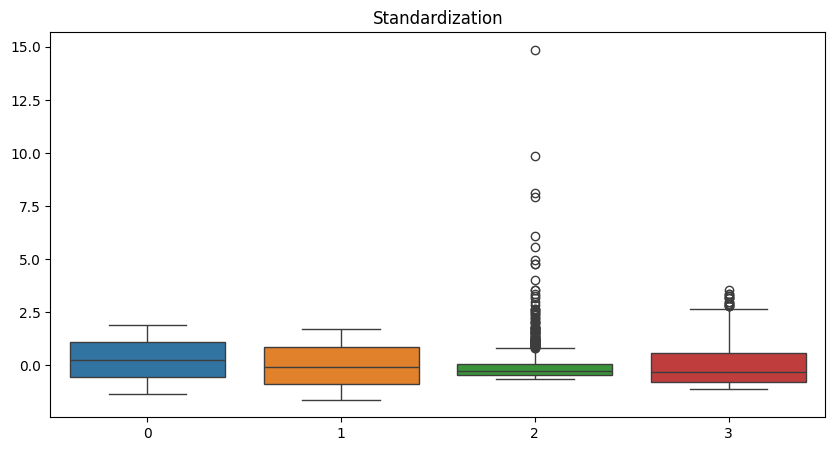

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_std)
plt.title('Standardization')

In [ ]:
X_norm = normalize(X)

Text(0.5, 1.0, 'Normalization')

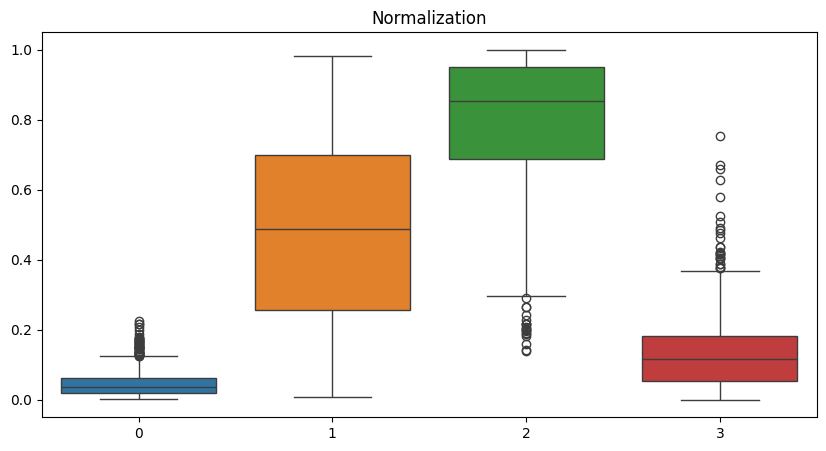

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_norm)
plt.title('Normalization')

In [ ]:
X_min_max = MinMaxScaler().fit_transform(X)

Text(0.5, 1.0, 'Min-Max Scaling')

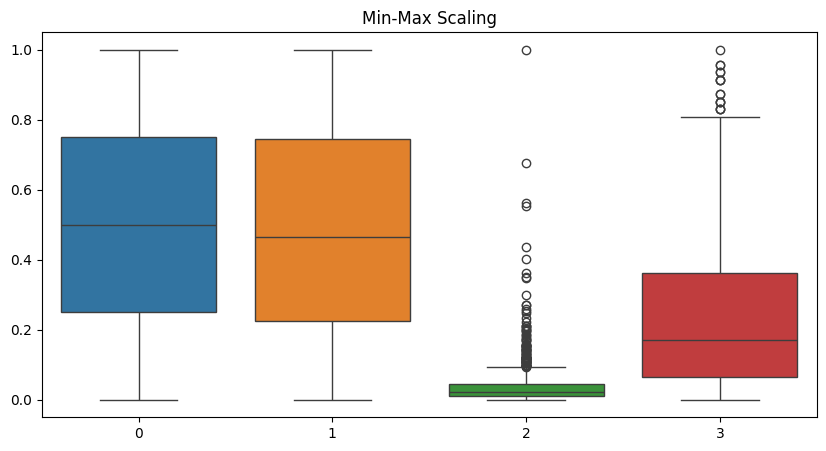

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=X_min_max)
plt.title('Min-Max Scaling')

#Training the KNN model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=32)

In [ ]:
k = 2

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn_model = knn_classifier.fit(X_train,y_train)

#Prediction

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.335

#Analysing the model for different value of k

In [ ]:
k_limit = 100
acc = np.zeros(k_limit)
std_acc = np.zeros(k_limit)

In [ ]:
for n in range(1,k_limit+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

In [ ]:
acc

array([0.36 , 0.335, 0.355, 0.305, 0.355, 0.36 , 0.375, 0.385, 0.39 ,
       0.385, 0.4  , 0.39 , 0.41 , 0.395, 0.395, 0.415, 0.4  , 0.405,
       0.4  , 0.41 , 0.41 , 0.425, 0.415, 0.405, 0.42 , 0.435, 0.395,
       0.41 , 0.385, 0.42 , 0.4  , 0.43 , 0.39 , 0.4  , 0.4  , 0.41 ,
       0.41 , 0.415, 0.405, 0.42 , 0.445, 0.45 , 0.45 , 0.435, 0.46 ,
       0.425, 0.415, 0.42 , 0.415, 0.405, 0.425, 0.42 , 0.42 , 0.415,
       0.42 , 0.42 , 0.435, 0.45 , 0.45 , 0.43 , 0.445, 0.41 , 0.415,
       0.415, 0.42 , 0.415, 0.42 , 0.415, 0.42 , 0.415, 0.405, 0.425,
       0.415, 0.42 , 0.425, 0.43 , 0.425, 0.425, 0.435, 0.425, 0.44 ,
       0.44 , 0.415, 0.415, 0.405, 0.405, 0.405, 0.41 , 0.42 , 0.42 ,
       0.42 , 0.425, 0.41 , 0.425, 0.42 , 0.43 , 0.435, 0.445, 0.44 ,
       0.45 ])

In [ ]:
std_acc

array([0.03394113, 0.03337477, 0.033836  , 0.03255572, 0.033836  ,
       0.03394113, 0.03423266, 0.03440748, 0.03448913, 0.03440748,
       0.03464102, 0.03448913, 0.03477787, 0.03456696, 0.03456696,
       0.03484071, 0.03464102, 0.03471131, 0.03464102, 0.03477787,
       0.03477787, 0.03495533, 0.03484071, 0.03471131, 0.03489986,
       0.03505531, 0.03456696, 0.03477787, 0.03440748, 0.03489986,
       0.03464102, 0.03500714, 0.03448913, 0.03464102, 0.03464102,
       0.03477787, 0.03477787, 0.03484071, 0.03471131, 0.03489986,
       0.03514079, 0.03517812, 0.03517812, 0.03505531, 0.03524202,
       0.03495533, 0.03484071, 0.03489986, 0.03484071, 0.03471131,
       0.03495533, 0.03489986, 0.03489986, 0.03484071, 0.03489986,
       0.03489986, 0.03505531, 0.03517812, 0.03517812, 0.03500714,
       0.03514079, 0.03477787, 0.03484071, 0.03484071, 0.03489986,
       0.03484071, 0.03489986, 0.03484071, 0.03489986, 0.03484071,
       0.03471131, 0.03495533, 0.03484071, 0.03489986, 0.03495

Eg. This means your accuracy of 0.6 has a standard error of ±0.155, which shows how much the accuracy might vary if you tried it on another sample of 10 items.

Text(0.5, 0, 'Number of Neighbors (K)')

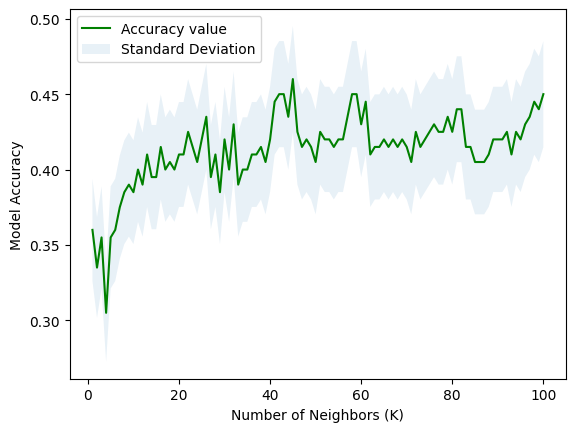

In [ ]:
plt.plot(range(1,k_limit+1),acc, 'g')
plt.fill_between(range(1,k_limit+1),acc - std_acc, acc + std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')

In [ ]:
acc.max()

np.float64(0.46)

In [ ]:
acc.argmax()+1

np.int64(45)

The weak performance on the model can be due to multiple reasons.
1. The KNN model relies entirely on the raw feature space at inference time. If the features do no provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation.
2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN.
3. The algorithm treats all features equally when computing distances. Hence, weakly correalted features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.

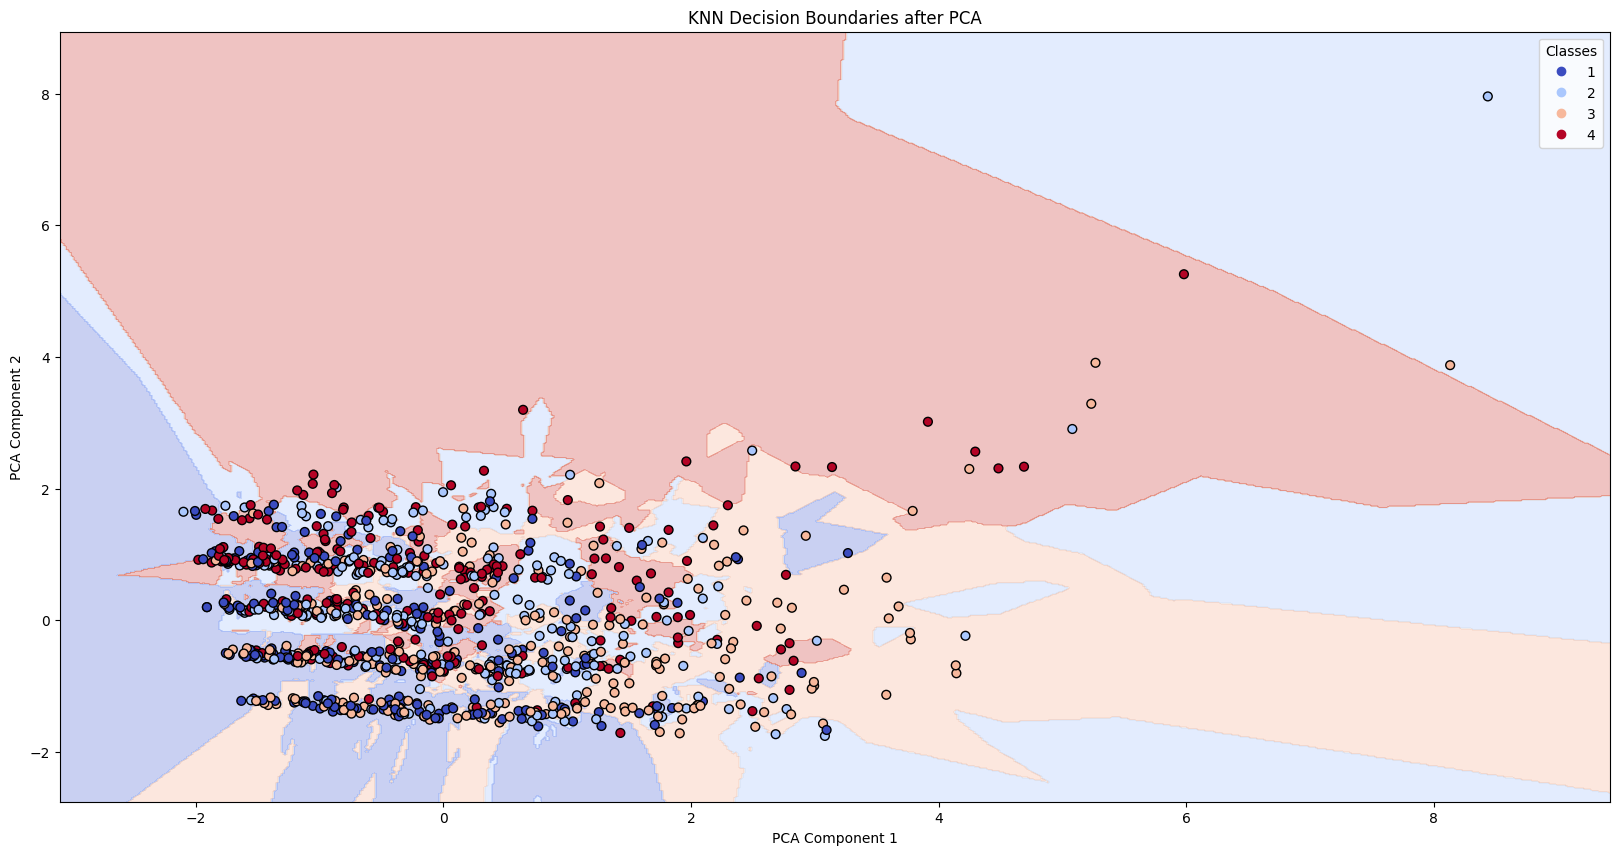

In [ ]:
# from sklearn.decomposition import PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # X = your feature matrix

# # Step 2: Reduce to 2D with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Optional: Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# # Step 3: Train the model
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)


# # Step 4: Create mesh grid for decision surface
# h = 0.02
# x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
# y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # Step 5: Predict over grid
# Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Step 6: Plot
# plt.figure(figsize=(20, 10))
# plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('KNN Decision Boundaries after PCA')
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.show()


In [ ]:
# y_pred = knn.predict(X_test)
# acc = accuracy_score(y_test, y_pred)